<a href="https://colab.research.google.com/github/IngErnestoAlvarez/terremoto_research/blob/main/da%C3%B1o_a_residencias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import (MultipleLocator,
                               FormatStrFormatter,
                               AutoMinorLocator)

%matplotlib inline

# haciendo los graficos un poco mas bonitos en matplotlib
plt.style.use('default') 
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

# suprimimos la notacion cientifica en los outputs
pd.options.display.float_format = '{:20,.2f}'.format 

import warnings
warnings.filterwarnings('ignore')

In [4]:
values = pd.read_csv("train_values.csv")
values.head(5)

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0


In [5]:
labels = pd.read_csv("train_labels.csv")
labels.head(5)

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3


In [34]:
values['residential'] = ((values['has_secondary_use'] == 0) | (values['has_secondary_use_rental'] == 1)) & (values['count_families'] > 0)
values_edificios_residenciales = values.loc[:, ['building_id', 'residential']]
values_edificios_residenciales

,building_id,residential
0,802906,True
1,28830,True
2,94947,True
3,590882,True
4,201944,True
...,...,...
260596,688636,True
260597,669485,True
260598,602512,True
260599,151409,True


In [103]:
residencial_o_no = values_edificios_residenciales.groupby('residential').count()
residencial_o_no.reset_index(inplace=True)
residencial_o_no

,residential,building_id
0,False,43606
1,True,216995


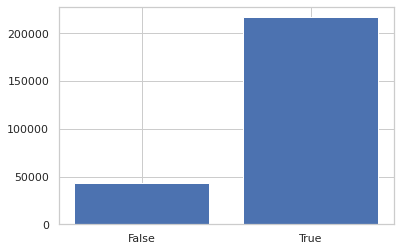

In [44]:

plt.bar(['False', 'True'], residencial_o_no['building_id'])
plt.show()

In [46]:
danio_edificios = values_edificios_residenciales.merge(labels, how='left')
danio_edificios

,building_id,residential,damage_grade
0,802906,True,3
1,28830,True,2
2,94947,True,3
3,590882,True,2
4,201944,True,3
...,...,...,...
260596,688636,True,2
260597,669485,True,3
260598,602512,True,3
260599,151409,True,2


In [81]:
residential_vs_no_residential = danio_edificios.groupby(['residential', 'damage_grade']).count()
residential_vs_no_residential

building_id
residential damage_grade             
False       1                    6195
            2                   25586
            3                   11825
True        1                   18929
            2                  122673
            3                   75393

In [82]:
residential_vs_no_residential.loc[False, 1] +=  residential_vs_no_residential.loc[False, 2] + residential_vs_no_residential.loc[False, 3]
residential_vs_no_residential.loc[False, 2] +=  residential_vs_no_residential.loc[False, 3]
residential_vs_no_residential.loc[True, 1] +=  residential_vs_no_residential.loc[True, 2] + residential_vs_no_residential.loc[True, 3]
residential_vs_no_residential.loc[True, 2] +=  residential_vs_no_residential.loc[True, 3]
residential_vs_no_residential

building_id
residential damage_grade             
False       1                   43606
            2                   37411
            3                   11825
True        1                  216995
            2                  198066
            3                   75393

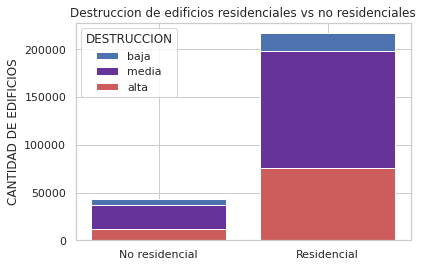

In [99]:
# En azul la cantidad de edificios
x_labels = ['No residencial', 'Residencial']
plt.bar(x_labels, residencial_o_no['building_id'], color='blue')

# En celeste la cantidad de edificios con low-damage
y_axis_destruccion_total = [residential_vs_no_residential.loc[False,1]['building_id'], residential_vs_no_residential.loc[True,1]['building_id']] 
plt.bar(x_labels, y_axis_destruccion_total, label='baja')

# En violeta la cantidad de edificios con medium-damage
y_axis_destruccion_media = [residential_vs_no_residential.loc[False,2]['building_id'], residential_vs_no_residential.loc[True,2]['building_id']]
plt.bar(x_labels, y_axis_destruccion_media, color='rebeccapurple', label='media')

# En rojo la cantidad de edificios con serious-damage
y_axis_destruccion_baja = [residential_vs_no_residential.loc[False,3]['building_id'], residential_vs_no_residential.loc[True,3]['building_id']] 
plt.bar(x_labels, y_axis_destruccion_baja, color='indianred', label='alta')

plt.legend(title="DESTRUCCION")
plt.ylabel("CANTIDAD DE EDIFICIOS")
plt.title("Destruccion de edificios residenciales vs no residenciales")
plt.show()

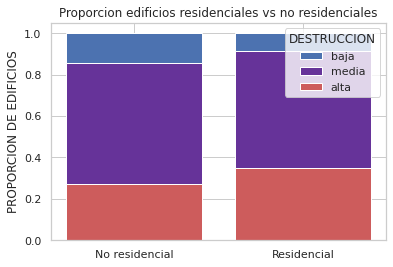

In [108]:
# En celeste la cantidad de edificios con low-damage
y_axis_destruccion_total = [residential_vs_no_residential.loc[False,1]['building_id']/residencial_o_no['building_id'][0], residential_vs_no_residential.loc[True,1]['building_id']/residencial_o_no['building_id'][1]]

plt.bar(x_labels, y_axis_destruccion_total, label='baja')

# En violeta la cantidad de edificios con medium-damage
y_axis_destruccion_media = [residential_vs_no_residential.loc[False,2]['building_id']/residencial_o_no['building_id'][0], residential_vs_no_residential.loc[True,2]['building_id']/residencial_o_no['building_id'][1]]
plt.bar(x_labels, y_axis_destruccion_media, color='rebeccapurple', label='media')

# En rojo la cantidad de edificios con serious-damage
y_axis_destruccion_baja = [residential_vs_no_residential.loc[False,3]['building_id']/residencial_o_no['building_id'][0], residential_vs_no_residential.loc[True,3]['building_id']/residencial_o_no['building_id'][1]]
plt.bar(x_labels, y_axis_destruccion_baja, color='indianred', label='alta')

plt.legend(title="DESTRUCCION")
plt.ylabel("PROPORCION DE EDIFICIOS")
plt.title("Proporcion edificios residenciales vs no residenciales")
plt.show()